In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
%matplotlib inline


from sklearn.cluster import KMeans

In [3]:
# Load data from CSV
df = pd.read_csv('UsArrests.csv')

# Clean data
df = df.drop_duplicates()
df = df.dropna()

df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
#Get info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
# Scale the data
min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(df.iloc[:, 1:5])
scaled= pd.DataFrame(scaled, columns = df.columns[1:5])
scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
# Heatmap
def df_heatmap(df, dp, size):
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(size, size))
  # Mask the mirrored side
    dropSelf = np.zeros_like(df)
    dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map
    if dp == 1:
        ax = sns.heatmap(df, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
    else:
        ax = sns.heatmap(df, cmap=colormap, fmt=".2f", linewidth=2)

    plt.show()

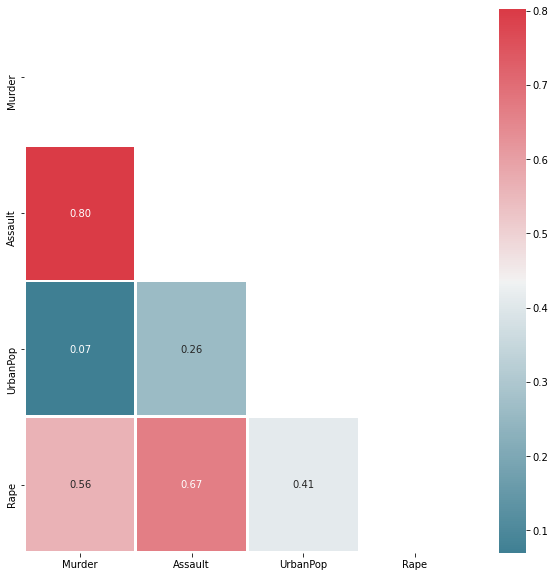

In [7]:
df_heatmap(scaled.corr(), 1, 10)

In [8]:
#This shows that murder is related to assult

In [13]:
#Fit for PCA
pca = PCA()
pca.fit(scaled)

PCA()

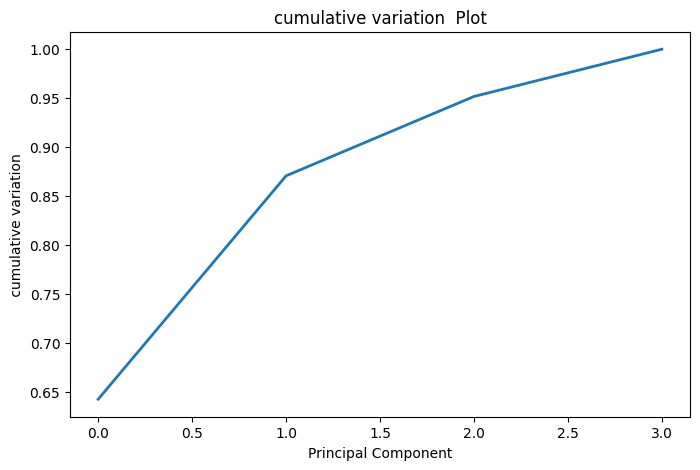

In [14]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.title('cumulative variation  Plot')
plt.xlabel('Principal Component')
plt.ylabel(' cumulative variation ')
plt.show()


In [15]:
# Specify the number of components
pca = PCA(n_components = 2)

In [16]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(scaled)

In [18]:
# Get principal components
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(principal_components, index = scaled.index)

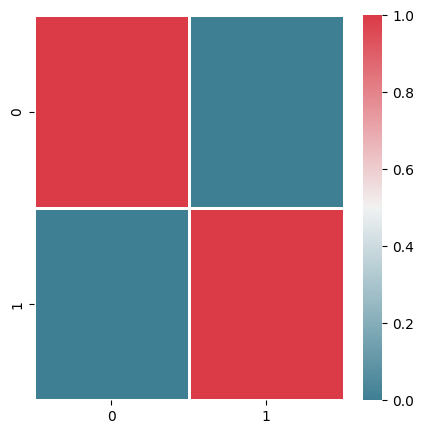

In [19]:
# Heatmap of the principal components dataframe
df_heatmap(pca_df.corr(), 0, 5)

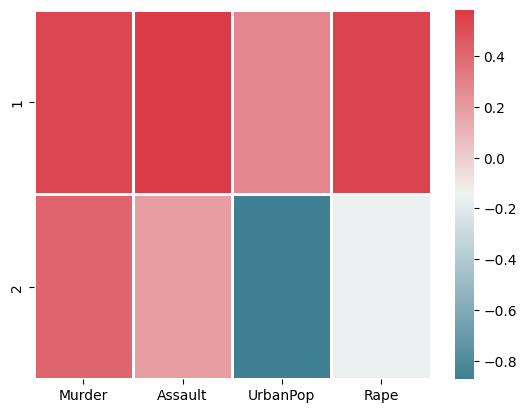

In [20]:
components = pd.DataFrame(pca.components_, columns = df.columns[1:], index=[1,2]) 

# Colormap with diverging colors
colormap = sns.diverging_palette(220, 10, as_cmap=True) 
ax = sns.heatmap(components,cmap=colormap,
                 linewidth=1.8)
plt.show()

In [17]:
# From the above we know that all of the variables were important except feature pairs with similar correlations.

C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

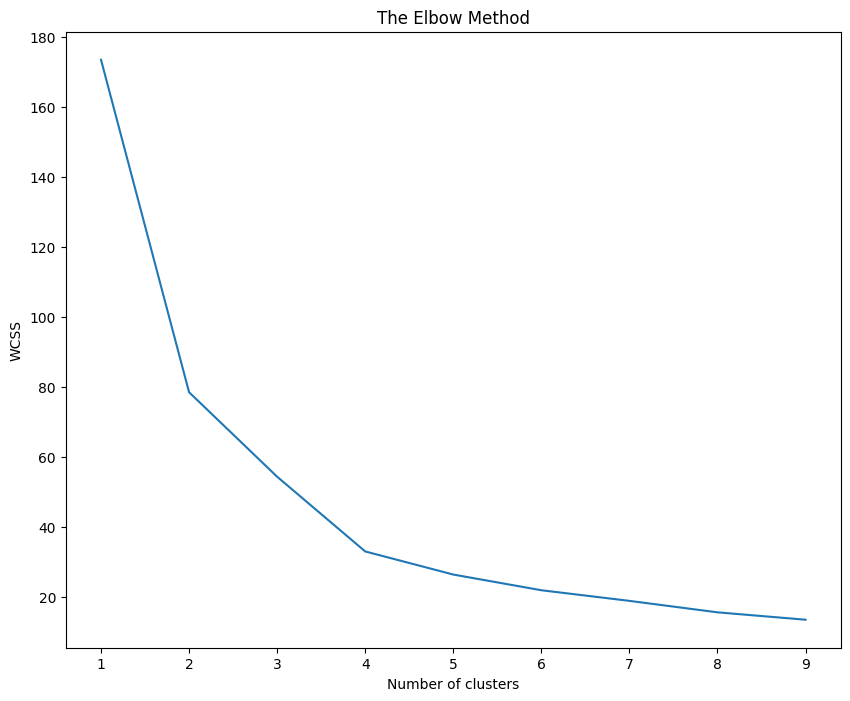

In [21]:
# K-Means Clustering

# Elbow method to determine best amount of clusters for k-means model
plt.figure(figsize=(10, 8))
wcss = [] # empty string where inertia values will be stored
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [22]:
# Develop K-means model with k = 4 and plot clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_pred = kmeans.fit_predict(pca_df)

C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


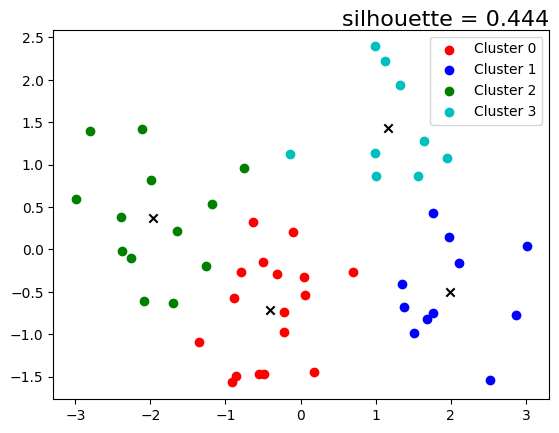

In [23]:
colours = 'rbgcmy'
k = kmeans.n_clusters
for c in range(k):
    xp = pca_df[y_pred == c]
    plt.plot(figsize = (10, 10))
    plt.scatter(xp[0], xp[1], c = colours[c], label = 'Cluster {}'.format(c))
    plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker = 'x', c = 'black')
score = round(silhouette_score(pca_df, kmeans.labels_, metric='euclidean'),3)
plt.title('silhouette = {}'.format(score), loc='right', fontdict={'fontsize': 16}, pad = -14)
plt.legend()
plt.show()

In [26]:
# The K-Means clustering model gives the silhouette score of 0.444.

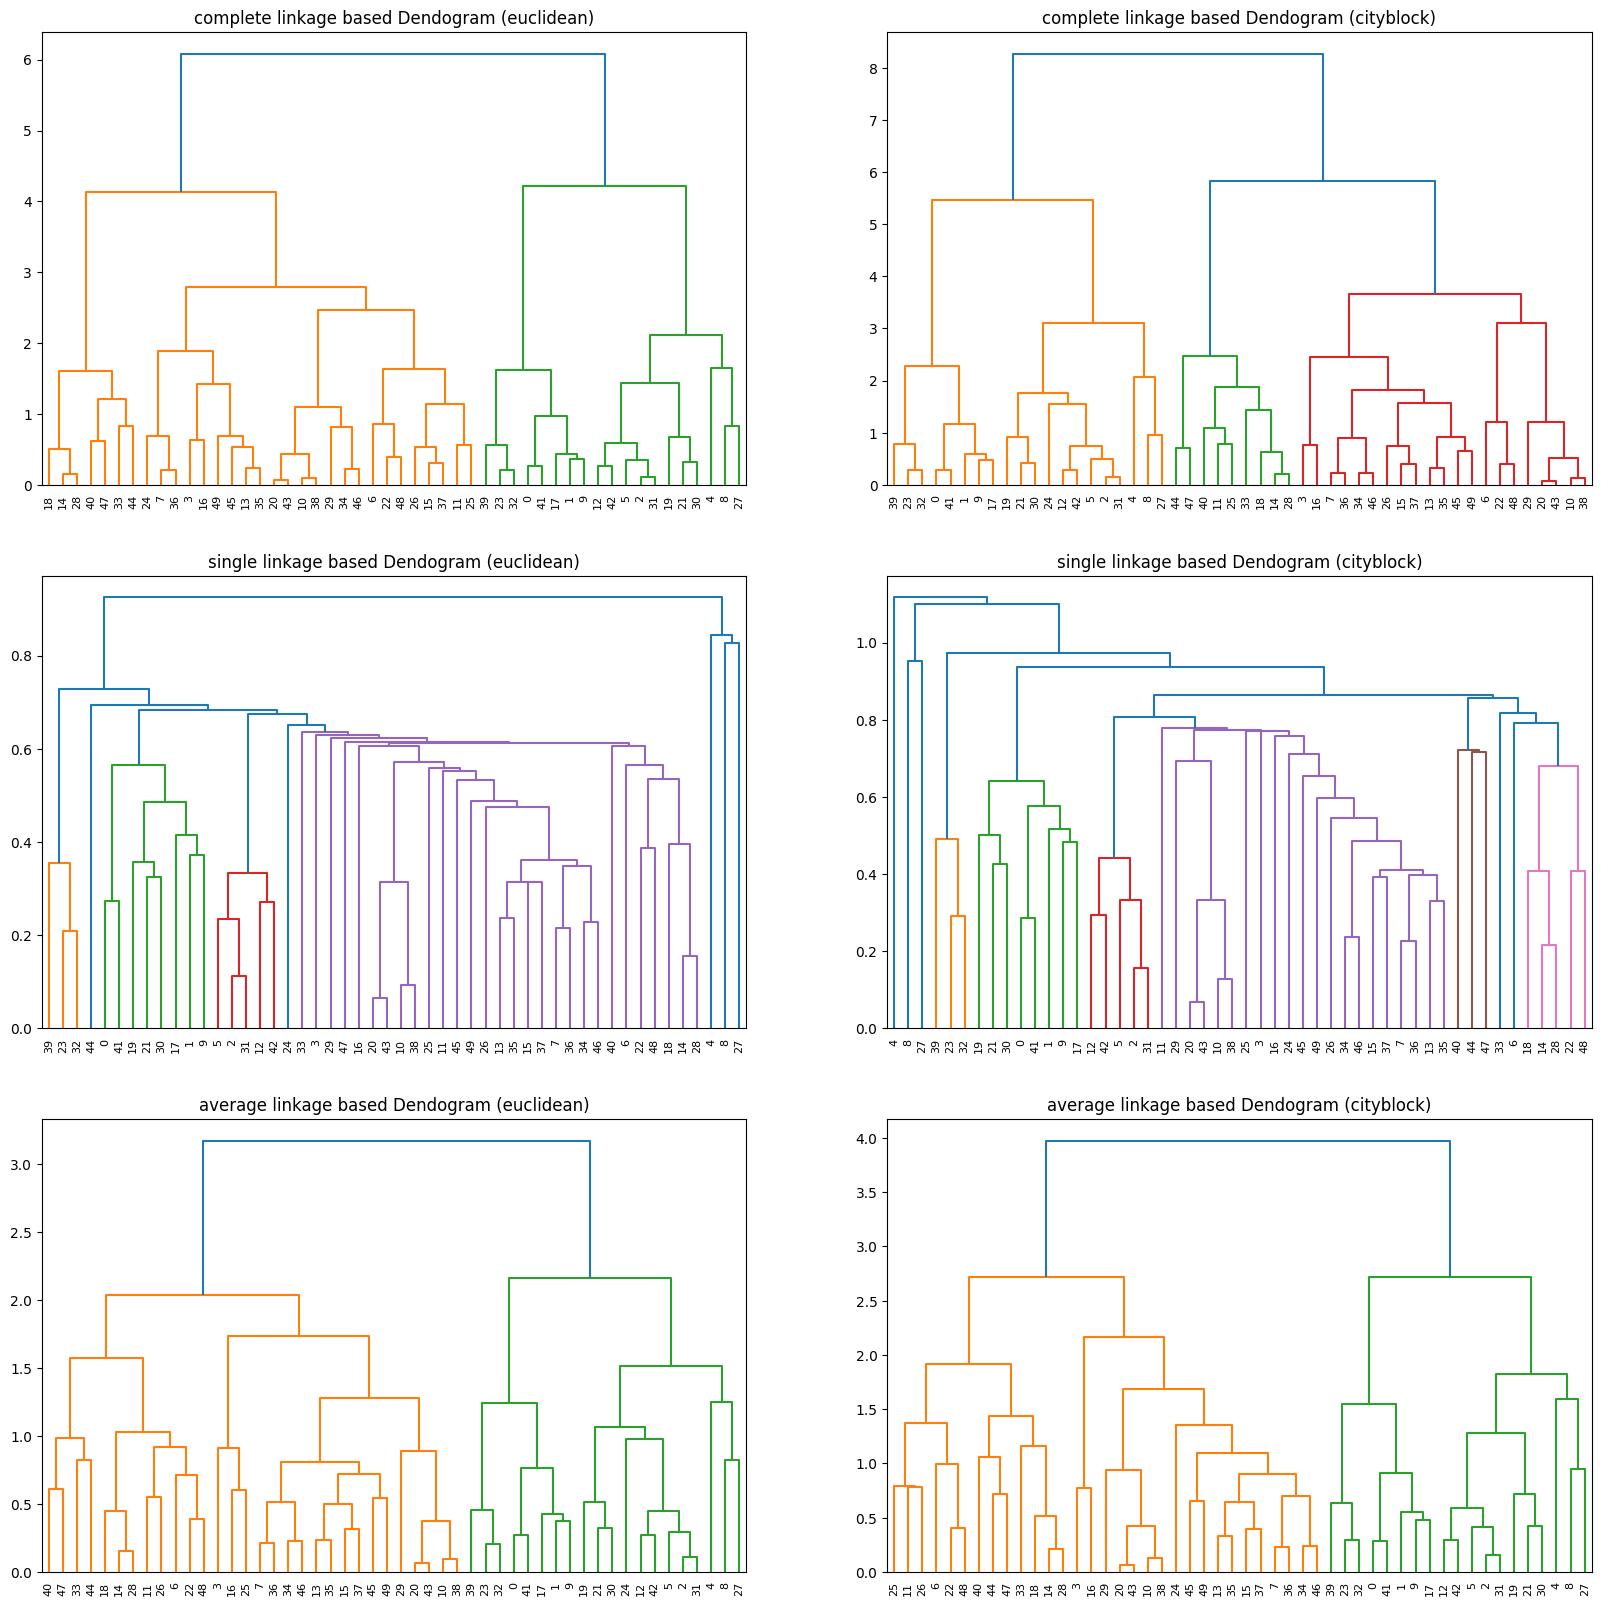

In [24]:
# Agglomerative Clustering

# Plot dendograms
X = pca_df

method = ['complete', 'single','average']
geometry = ['euclidean', 'cityblock']

fig, axes = plt.subplots(3, 2, figsize = (20, 20))
p = 0

for meth in method: 
    for geom in geometry:
        p += 1
        plt.subplot(3, 2, p)
        plt.title(meth + ' linkage based Dendogram (' + geom + ')')  
        dend = dendrogram(linkage(X, method = meth, metric = geom)) 

Text(0, 0.5, 'Silhouette Score')

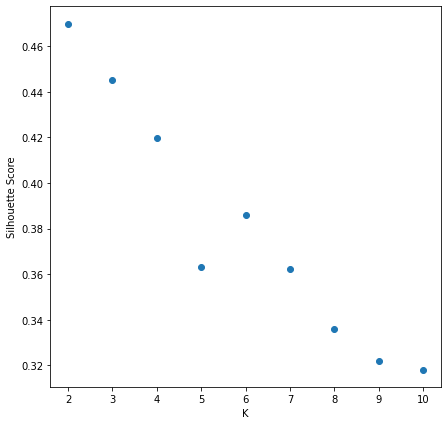

In [37]:
# sensitivity analysis
K_min= 2
K_max = 10
score =[]
for K in range(K_min, K_max +1):
    model = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'complete')
    y_preds = model.fit_predict(X)
    score.append(silhouette_score(X, model.labels_, metric = 'euclidean'))
plt.subplots(1, 1, figsize = (7, 7))
plt.scatter(x = range(K_min, K_max +1), y = score)

plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [38]:
# the agglomerative sensitivity analysis indicates that the number of clusters should be 2 . 
# The dendograms also indicate that the smallest number of clusters that would work are 2 for the Euclidean complete linkage and the average linkage based denograms.

In [25]:
# creating agglomerativeClustering with k = 2
k=2
cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
y_pred = cluster.fit_predict(X)

C:\Users\Lee Kaplan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


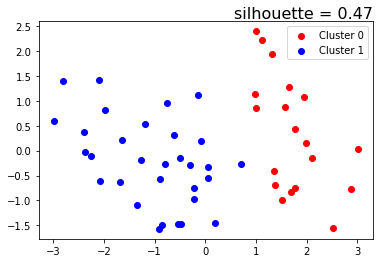

In [45]:
colours = 'rbgcmy'
k = cluster.n_clusters
for c in range(k):
    xp = X[y_pred == c]
    plt.plot(figsize = (10, 10))
    plt.scatter(xp[0], xp[1], c = colours[c], label = 'Cluster {}'.format(c))
score = round(silhouette_score(X, cluster.labels_, metric='euclidean'),3)
plt.title('silhouette = {}'.format(score), loc='right', fontdict={'fontsize': 16}, pad = -14)
plt.legend()
plt.show()

In [26]:
# The Agglomerative Clustering method indicates that there are two clusters with a Silhouette score of 0.47.
# the elbow method suggested to use number of clusters as 4 whereas doing the sensitivity analysis suggested to use
#  2 as a cluster

#  The silhoutte score also indicates that agglomerative clustering is a bit better than kmeans where agglomerative
# clustering method got score of 0.47 and kmeans had the score of 0.44

